In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
start = '2014-01-01'
end = '2024-01-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)

In [8]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.656164,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.454418,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.760517,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.295691,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.354576,90036218
...,...,...,...,...,...,...,...
2524,2024-01-12,144.339996,144.740005,143.360001,144.240005,143.886642,13995200
2525,2024-01-16,143.429993,145.839996,143.056000,144.080002,143.727036,19198900
2526,2024-01-17,142.910004,143.410004,140.509995,142.889999,142.539948,17884500
2527,2024-01-18,143.440002,145.585007,143.350006,144.990005,144.634796,18876800


In [9]:
ma_100_days = data.Close.rolling(100).mean()

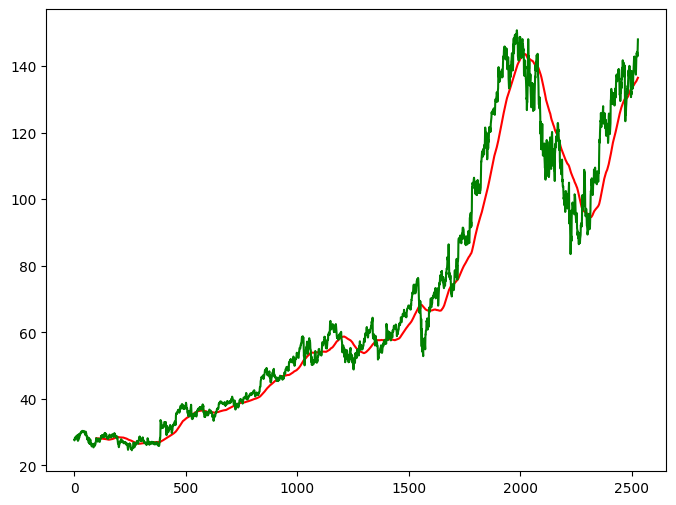

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

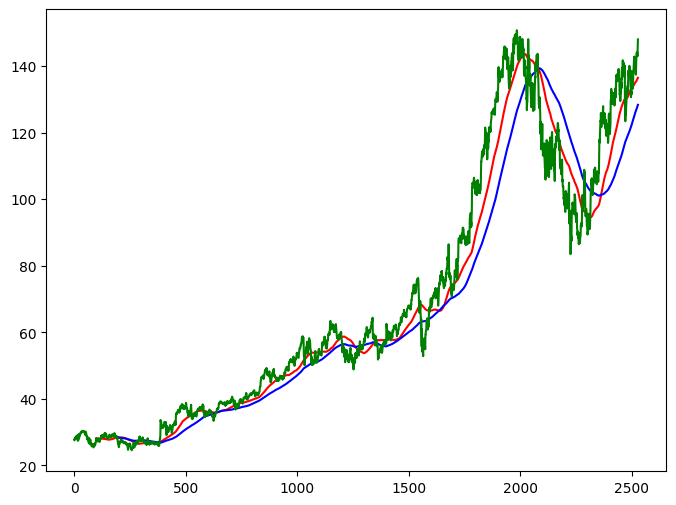

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [14]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
data_train.shape[0]

2023

In [16]:
data_test.shape[0]

506

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)

In [23]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [24]:
x, y = np.array(x), np.array(y)

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - loss: 0.0631
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - loss: 0.0062
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - loss: 0.0035
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - loss: 0.0055
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - loss: 0.0046
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - loss: 0.0038
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - loss: 0.0041
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - loss: 0.0037
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step - loss: 0.0031
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - loss: 0.0032
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0026
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0032
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0027
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0035
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [30]:
pas_100_days = data_train.tail(100)

In [31]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [32]:
data_test_scale  =  scaler.fit_transform(data_test)

In [33]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [34]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step


In [35]:
scale =1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

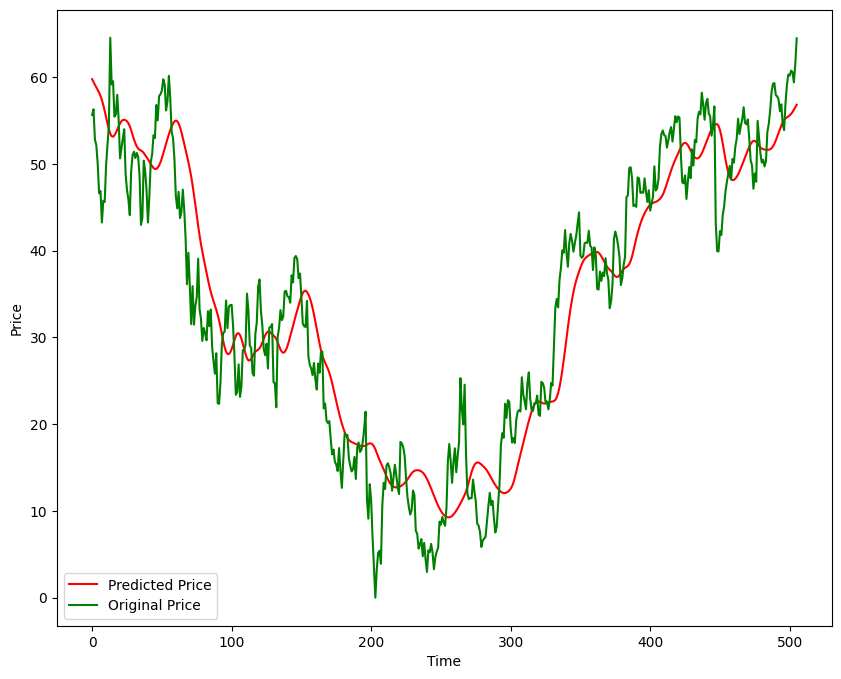

In [38]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
model.save('Stock Predictions Model.keras')